In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Load the mental health lifestyle dataset
df = pd.read_csv('Mental_Health_Dataset_final.csv')

print("="*70)
print("DATASET LOADED SUCCESSFULLY")
print("="*70)
print(f"\nTotal Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")

DATASET LOADED SUCCESSFULLY

Total Records: 3000
Total Features: 12


In [3]:
# Display first few records
print("="*70)
print("FIRST 5 ROWS OF THE DATASET")
print("="*70)
df.head()

FIRST 5 ROWS OF THE DATASET


,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Japan,48,Female,High,Keto,2.0,High,NaN,42,7.3,2.3,2.8
1,Australia,56,Male,Low,Vegetarian,5.1,Moderate,Depression,20,7.4,2.2,3.0
2,Brazil,64,Male,Moderate,Balanced,3.5,High,PTSD,37,6.6,1.9,2.7
3,Germany,58,Female,Low,Junk Food,4.3,High,Anxiety,46,6.5,5.3,4.7
4,Canada,26,Female,Low,Keto,4.8,High,Bipolar,52,7.0,7.9,5.7


In [4]:
# Display dataset information
print("="*70)
print("DATASET INFORMATION")
print("="*70)
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2700 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ 

In [5]:
# Display statistical summary
print("="*70)
print("STATISTICAL SUMMARY OF NUMERICAL FEATURES")
print("="*70)
df.describe()

STATISTICAL SUMMARY OF NUMERICAL FEATURES


,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,40.975333,4.932267,38.809000,5.967000,3.89920,3.923100
std,13.431066,1.946281,9.735645,1.345618,2.14338,2.137745
min,18.000000,2.000000,20.000000,2.000000,1.00000,1.000000
25%,29.000000,3.600000,32.000000,5.100000,2.10000,2.400000
50%,41.000000,4.600000,39.000000,6.000000,3.50000,3.500000
75%,52.000000,5.700000,45.250000,7.000000,5.10000,5.000000
max,64.000000,11.000000,60.000000,8.000000,10.00000,10.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


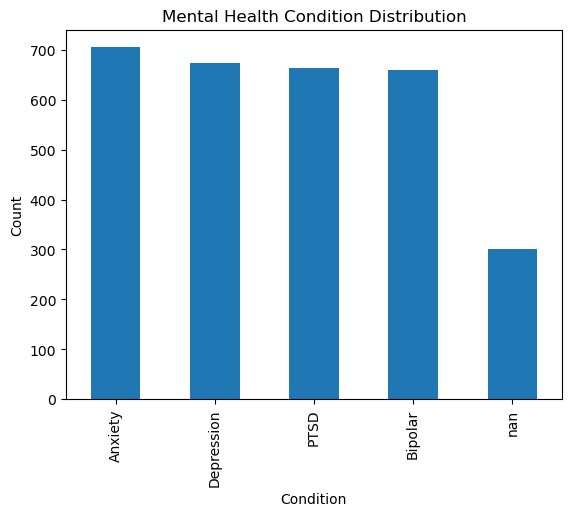

In [7]:
plt.figure()
df['Mental Health Condition'].value_counts(dropna=False).plot(kind='bar')
plt.title("Mental Health Condition Distribution")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()


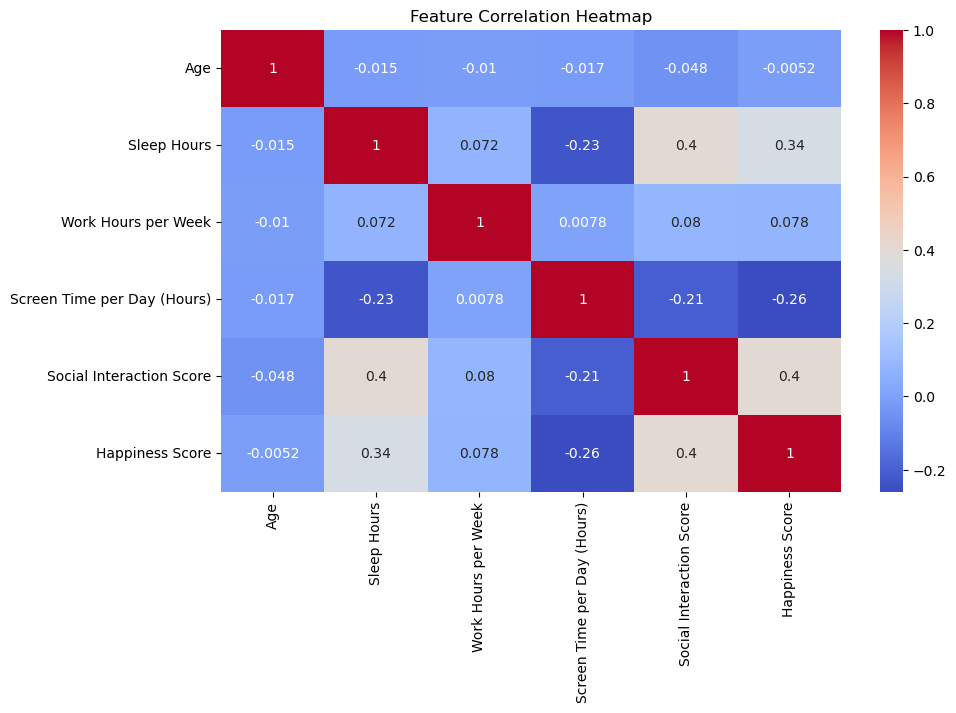

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.select_dtypes(include=['int64', 'float64']).corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
# Check for missing values
print("="*70)
print("MISSING VALUES CHECK")
print("="*70)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal Missing Values: {missing_values.sum()}")

MISSING VALUES CHECK
Country                          0
Age                              0
Gender                           0
Exercise Level                   0
Diet Type                        0
Sleep Hours                      0
Stress Level                     0
Mental Health Condition        300
Work Hours per Week              0
Screen Time per Day (Hours)      0
Social Interaction Score         0
Happiness Score                  0
dtype: int64

Total Missing Values: 300


In [10]:
# Display all column names
print("="*70)
print("COLUMN NAMES")
print("="*70)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

COLUMN NAMES
1. Country
2. Age
3. Gender
4. Exercise Level
5. Diet Type
6. Sleep Hours
7. Stress Level
8. Mental Health Condition
9. Work Hours per Week
10. Screen Time per Day (Hours)
11. Social Interaction Score
12. Happiness Score


In [11]:
# Display data types
print("="*70)
print("DATA TYPES OF EACH COLUMN")
print("="*70)
df.dtypes

DATA TYPES OF EACH COLUMN


Country                         object
Age                              int64
Gender                          object
Exercise Level                  object
Diet Type                       object
Sleep Hours                    float64
Stress Level                    object
Mental Health Condition         object
Work Hours per Week              int64
Screen Time per Day (Hours)    float64
Social Interaction Score       float64
Happiness Score                float64
dtype: object

In [12]:
# Check unique values in categorical columns
print("="*70)
print("UNIQUE VALUES IN CATEGORICAL COLUMNS")
print("="*70)

categorical_cols = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 
                    'Stress Level', 'Mental Health Condition']

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Values: {df[col].unique()}")

UNIQUE VALUES IN CATEGORICAL COLUMNS

Country:
  Unique values: 7
  Values: ['Japan' 'Australia' 'Brazil' 'Germany' 'Canada' 'India' 'USA']

Gender:
  Unique values: 3
  Values: ['Female' 'Male' 'Other']

Exercise Level:
  Unique values: 3
  Values: ['High' 'Low' 'Moderate']

Diet Type:
  Unique values: 5
  Values: ['Keto' 'Vegetarian' 'Balanced' 'Junk Food' 'Vegan']

Stress Level:
  Unique values: 3
  Values: ['High' 'Moderate' 'Low']

Mental Health Condition:
  Unique values: 4
  Values: [nan 'Depression' 'PTSD' 'Anxiety' 'Bipolar']


In [13]:
# Check distribution of target variable
print("="*70)
print("MENTAL HEALTH CONDITION DISTRIBUTION")
print("="*70)
target_dist = df['Mental Health Condition'].value_counts()
print(target_dist)
print(f"\nPercentage Distribution:")
print(df['Mental Health Condition'].value_counts(normalize=True) * 100)

MENTAL HEALTH CONDITION DISTRIBUTION
Mental Health Condition
Anxiety       705
Depression    673
PTSD          663
Bipolar       659
Name: count, dtype: int64

Percentage Distribution:
Mental Health Condition
Anxiety       26.111111
Depression    24.925926
PTSD          24.555556
Bipolar       24.407407
Name: proportion, dtype: float64


In [14]:

print("="*70)
print("REMOVING COUNTRY COLUMN")
print("="*70)
print(f"Columns before removal: {df.shape[1]}")
df = df.drop('Country', axis=1)
print(f"Columns after removal: {df.shape[1]}")
print(f"\nRemaining columns:")
print(df.columns.tolist())

REMOVING COUNTRY COLUMN
Columns before removal: 12
Columns after removal: 11

Remaining columns:
['Age', 'Gender', 'Exercise Level', 'Diet Type', 'Sleep Hours', 'Stress Level', 'Mental Health Condition', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']


In [15]:
# Separate features (X) and target variable (y)
print("="*70)
print("SEPARATING FEATURES AND TARGET VARIABLE")
print("="*70)

X = df.drop('Mental Health Condition', axis=1)
y = df['Mental Health Condition']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns:")
print(X.columns.tolist())

SEPARATING FEATURES AND TARGET VARIABLE
Features shape: (3000, 10)
Target shape: (3000,)

Feature columns:
['Age', 'Gender', 'Exercise Level', 'Diet Type', 'Sleep Hours', 'Stress Level', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']


In [16]:
# Identify categorical and numerical columns
print("="*70)
print("IDENTIFYING COLUMN TYPES")
print("="*70)

# Categorical columns (to be encoded)
categorical_cols = ['Gender', 'Exercise Level', 'Diet Type', 'Stress Level']

# Numerical columns (to be scaled)
numerical_cols = ['Age', 'Sleep Hours', 'Work Hours per Week', 
                  'Screen Time per Day (Hours)', 'Social Interaction Score', 
                  'Happiness Score']

print("Categorical Columns:")
for col in categorical_cols:
    print(f"  - {col}")

print("\nNumerical Columns:")
for col in numerical_cols:
    print(f"  - {col}")

IDENTIFYING COLUMN TYPES
Categorical Columns:
  - Gender
  - Exercise Level
  - Diet Type
  - Stress Level

Numerical Columns:
  - Age
  - Sleep Hours
  - Work Hours per Week
  - Screen Time per Day (Hours)
  - Social Interaction Score
  - Happiness Score


In [17]:
# Apply Label Encoding to Exercise Level and Stress Level (ordinal data)
print("="*70)
print("LABEL ENCODING FOR ORDINAL FEATURES")
print("="*70)

label_encoder = LabelEncoder()

# Encode Exercise Level
print("\nExercise Level encoding:")
print(f"Before: {X['Exercise Level'].unique()}")
X['Exercise Level'] = label_encoder.fit_transform(X['Exercise Level'])
print(f"After: {X['Exercise Level'].unique()}")

# Encode Stress Level
print("\nStress Level encoding:")
print(f"Before: {X['Stress Level'].unique()}")
X['Stress Level'] = label_encoder.fit_transform(X['Stress Level'])
print(f"After: {X['Stress Level'].unique()}")

LABEL ENCODING FOR ORDINAL FEATURES

Exercise Level encoding:
Before: ['High' 'Low' 'Moderate']
After: [0 1 2]

Stress Level encoding:
Before: ['High' 'Moderate' 'Low']
After: [0 2 1]


In [18]:
# Apply One-Hot Encoding to Gender and Diet Type (nominal data)
print("="*70)
print("ONE-HOT ENCODING FOR NOMINAL FEATURES")
print("="*70)

print(f"Shape before encoding: {X.shape}")

# One-hot encode Gender and Diet Type
X = pd.get_dummies(X, columns=['Gender', 'Diet Type'], drop_first=True)

print(f"Shape after encoding: {X.shape}")
print(f"\nNew columns after encoding:")
print(X.columns.tolist())

ONE-HOT ENCODING FOR NOMINAL FEATURES
Shape before encoding: (3000, 10)
Shape after encoding: (3000, 14)

New columns after encoding:
['Age', 'Exercise Level', 'Sleep Hours', 'Stress Level', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score', 'Gender_Male', 'Gender_Other', 'Diet Type_Junk Food', 'Diet Type_Keto', 'Diet Type_Vegan', 'Diet Type_Vegetarian']


In [19]:
# Check current columns in X
print("="*70)
print("CURRENT COLUMNS IN X")
print("="*70)
print(X.columns.tolist())
print(f"\nTotal columns: {len(X.columns)}")

CURRENT COLUMNS IN X
['Age', 'Exercise Level', 'Sleep Hours', 'Stress Level', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score', 'Gender_Male', 'Gender_Other', 'Diet Type_Junk Food', 'Diet Type_Keto', 'Diet Type_Vegan', 'Diet Type_Vegetarian']

Total columns: 14


In [20]:
# Encode target variable (Mental Health Condition)
print("="*70)
print("ENCODING TARGET VARIABLE")
print("="*70)

label_encoder_target = LabelEncoder()

print(f"Original classes: {y.unique()}")
y_encoded = label_encoder_target.fit_transform(y)
print(f"Encoded classes: {np.unique(y_encoded)}")

# Show mapping
print("\nClass Mapping:")
for i, class_name in enumerate(label_encoder_target.classes_):
    print(f"  {class_name} → {i}")

ENCODING TARGET VARIABLE
Original classes: [nan 'Depression' 'PTSD' 'Anxiety' 'Bipolar']
Encoded classes: [0 1 2 3 4]

Class Mapping:
  Anxiety → 0
  Bipolar → 1
  Depression → 2
  PTSD → 3
  nan → 4


In [21]:
# Split data into training and testing sets (80-20 split)
print("="*70)
print("TRAIN-TEST SPLIT (80-20)")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

TRAIN-TEST SPLIT (80-20)
Training set size: 2400 (80.0%)
Testing set size: 600 (20.0%)

Training features shape: (2400, 14)
Testing features shape: (600, 14)


In [22]:
# Apply StandardScaler to numerical features
print("="*70)
print("FEATURE SCALING (STANDARDIZATION)")
print("="*70)

scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Scaling completed!")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")

# Show sample statistics
print("\nSample statistics after scaling (first 5 columns):")
print(X_train_scaled.iloc[:, :5].describe())

FEATURE SCALING (STANDARDIZATION)
Scaling completed!

Scaled training data shape: (2400, 14)
Scaled testing data shape: (600, 14)

Sample statistics after scaling (first 5 columns):
                Age  Exercise Level   Sleep Hours  Stress Level  \
count  2.400000e+03    2.400000e+03  2.400000e+03  2.400000e+03   
mean   2.479498e-16    1.480297e-18 -2.102022e-16  1.391480e-16   
std    1.000208e+00    1.000208e+00  1.000208e+00  1.000208e+00   
min   -1.724441e+00   -1.822257e+00 -1.513619e+00 -7.058492e-01   
25%   -9.015125e-01   -2.519099e-01 -6.421640e-01 -7.058492e-01   
50%   -3.771758e-03   -2.519099e-01 -1.808055e-01 -7.058492e-01   
75%    8.191572e-01    1.318438e+00  3.830770e-01  4.681203e-01   
max    1.716898e+00    1.318438e+00  3.099966e+00  1.642090e+00   

       Work Hours per Week  
count         2.400000e+03  
mean          1.939190e-16  
std           1.000208e+00  
min          -1.951107e+00  
25%          -7.118444e-01  
50%           1.105870e-02  
75%        

In [23]:
# Train Logistic Regression Model
print("="*70)
print("LOGISTIC REGRESSION MODEL")
print("="*70)

# Initialize the model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

print("Logistic Regression model trained successfully!")

LOGISTIC REGRESSION MODEL
Logistic Regression model trained successfully!


In [24]:
# Evaluate Logistic Regression Model
print("="*70)
print("LOGISTIC REGRESSION - EVALUATION RESULTS")
print("="*70)

# Accuracy Score
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"\nAccuracy: {accuracy_logistic:.4f} ({accuracy_logistic*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
target_names = [str(name) for name in label_encoder_target.classes_]
print(classification_report(y_test, y_pred_logistic, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print(cm_logistic)

LOGISTIC REGRESSION - EVALUATION RESULTS

Accuracy: 0.6683 (66.83%)

Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.67      0.79      0.73       141
     Bipolar       0.77      0.72      0.75       132
  Depression       0.61      0.69      0.65       135
        PTSD       0.64      0.77      0.70       132
         nan       0.00      0.00      0.00        60

    accuracy                           0.67       600
   macro avg       0.54      0.59      0.56       600
weighted avg       0.61      0.67      0.63       600


Confusion Matrix:
[[112  17   8   4   0]
 [ 20  95  10   7   0]
 [ 13   1  93  28   0]
 [  8   0  23 101   0]
 [ 14  10  19  17   0]]


LOGISTIC REGRESSION - CONFUSION MATRIX HEATMAP


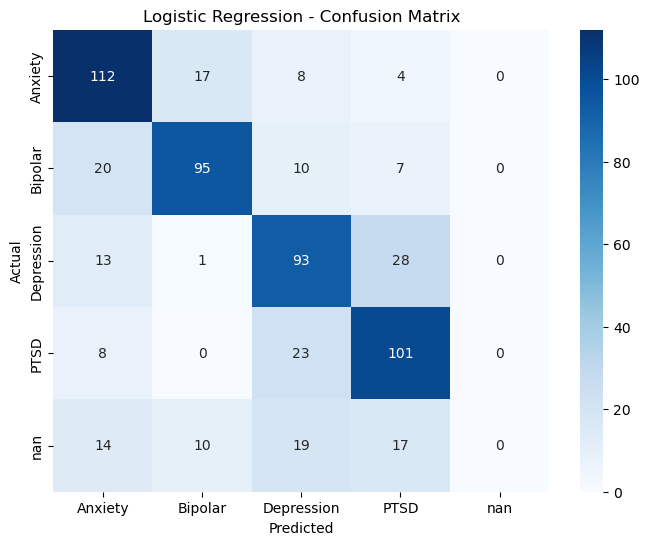

In [25]:
# Visualize Confusion Matrix for Logistic Regression
print("="*70)
print("LOGISTIC REGRESSION - CONFUSION MATRIX HEATMAP")
print("="*70)

target_names = [str(name) for name in label_encoder_target.classes_]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
# Train Decision Tree Model
print("="*70)
print("DECISION TREE MODEL")
print("="*70)

# Initialize the model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test_scaled)

print("Decision Tree model trained successfully!")

DECISION TREE MODEL
Decision Tree model trained successfully!


In [27]:
# Evaluate Decision Tree Model
print("="*70)
print("DECISION TREE - EVALUATION RESULTS")
print("="*70)

# Accuracy Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nAccuracy: {accuracy_dt:.4f} ({accuracy_dt*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
target_names = [str(name) for name in label_encoder_target.classes_]
print(classification_report(y_test, y_pred_dt, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

DECISION TREE - EVALUATION RESULTS

Accuracy: 0.5350 (53.50%)

Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.69      0.65      0.67       141
     Bipolar       0.69      0.65      0.67       132
  Depression       0.51      0.53      0.52       135
        PTSD       0.50      0.51      0.50       132
         nan       0.06      0.07      0.06        60

    accuracy                           0.54       600
   macro avg       0.49      0.48      0.49       600
weighted avg       0.55      0.54      0.54       600


Confusion Matrix:
[[92 22  9  4 14]
 [10 86  7 14 15]
 [15  2 72 33 13]
 [ 6  2 36 67 21]
 [10 12 17 17  4]]


DECISION TREE - CONFUSION MATRIX HEATMAP


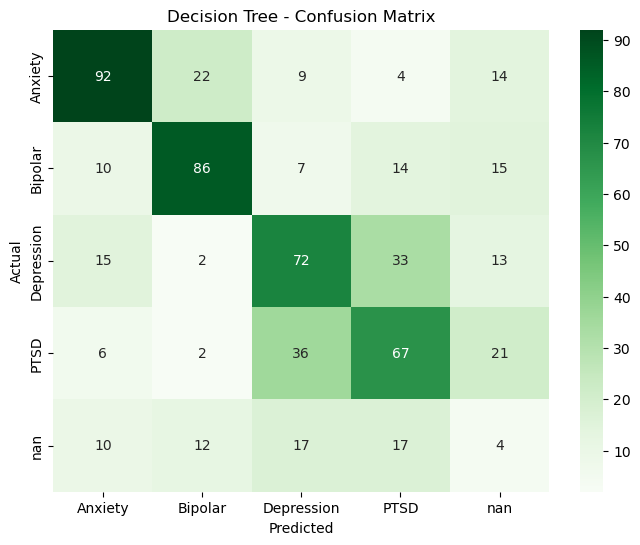

In [28]:
# Visualize Confusion Matrix for Decision Tree
print("="*70)
print("DECISION TREE - CONFUSION MATRIX HEATMAP")
print("="*70)

target_names = [str(name) for name in label_encoder_target.classes_]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
# Train Random Forest Model
print("="*70)
print("RANDOM FOREST MODEL")
print("="*70)

# Initialize the model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test_scaled)

print("Random Forest model trained successfully!")

RANDOM FOREST MODEL
Random Forest model trained successfully!


In [30]:
# Evaluate Random Forest Model
print("="*70)
print("RANDOM FOREST - EVALUATION RESULTS")
print("="*70)

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
target_names = [str(name) for name in label_encoder_target.classes_]
print(classification_report(y_test, y_pred_rf, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

RANDOM FOREST - EVALUATION RESULTS

Accuracy: 0.7050 (70.50%)

Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.76      0.85      0.80       141
     Bipolar       0.80      0.86      0.83       132
  Depression       0.62      0.67      0.65       135
        PTSD       0.65      0.75      0.69       132
         nan       0.00      0.00      0.00        60

    accuracy                           0.70       600
   macro avg       0.57      0.63      0.59       600
weighted avg       0.64      0.70      0.67       600


Confusion Matrix:
[[120  10   6   3   2]
 [ 10 113   6   3   0]
 [ 10   2  91  32   0]
 [  6   1  26  99   0]
 [ 12  15  17  16   0]]


RANDOM FOREST - CONFUSION MATRIX HEATMAP


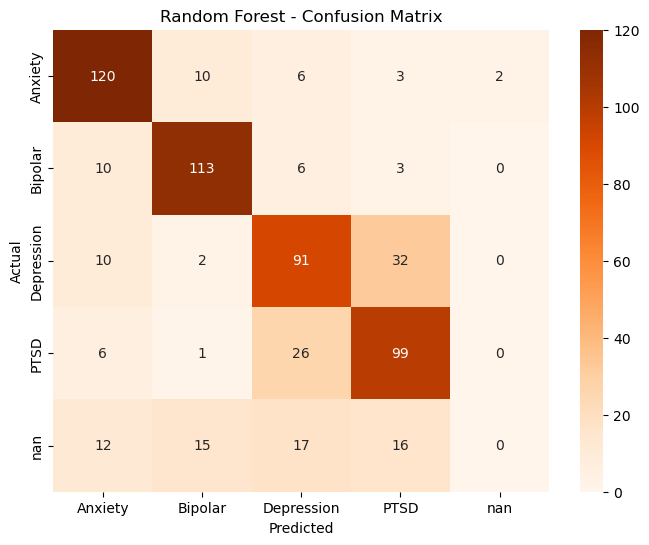

In [31]:
# Visualize Confusion Matrix for Random Forest
print("="*70)
print("RANDOM FOREST - CONFUSION MATRIX HEATMAP")
print("="*70)

target_names = [str(name) for name in label_encoder_target.classes_]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [32]:
# Compare all three models
print("="*70)
print("MODEL COMPARISON - ACCURACY SCORES")
print("="*70)

# Create comparison dataframe
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_logistic, accuracy_dt, accuracy_rf],
    'Accuracy (%)': [accuracy_logistic*100, accuracy_dt*100, accuracy_rf*100]
})

model_comparison = model_comparison.sort_values('Accuracy', ascending=False).reset_index(drop=True)
print(model_comparison)

print("\n" + "="*70)
print(f"BEST MODEL: {model_comparison.iloc[0]['Model']}")
print(f"BEST ACCURACY: {model_comparison.iloc[0]['Accuracy (%)']:.2f}%")
print("="*70)

MODEL COMPARISON - ACCURACY SCORES
                 Model  Accuracy  Accuracy (%)
0        Random Forest  0.705000     70.500000
1  Logistic Regression  0.668333     66.833333
2        Decision Tree  0.535000     53.500000

BEST MODEL: Random Forest
BEST ACCURACY: 70.50%


MODEL COMPARISON - BAR CHART


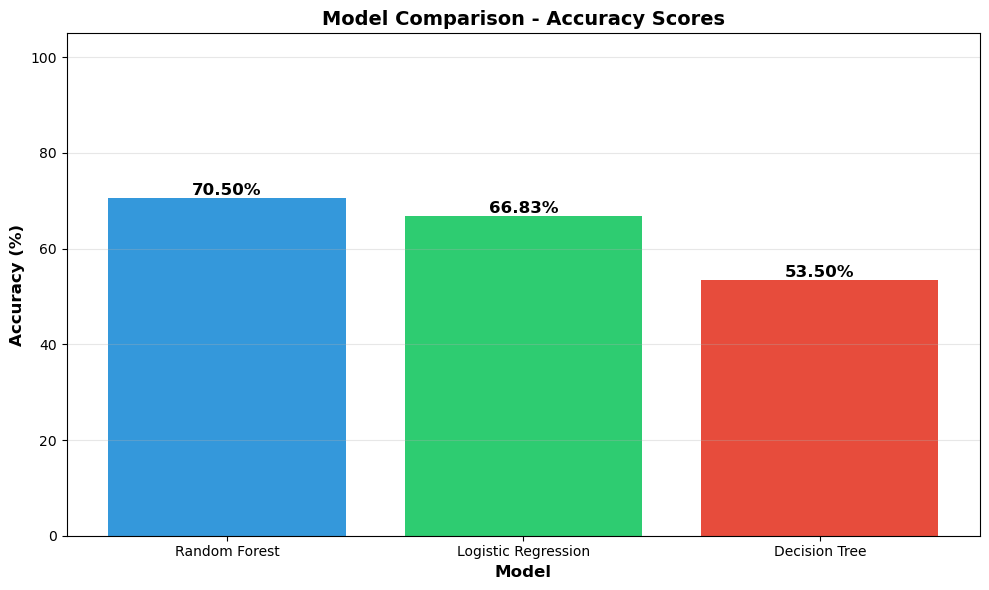

In [33]:
# Visualize model comparison using bar chart
print("="*70)
print("MODEL COMPARISON - BAR CHART")
print("="*70)

plt.figure(figsize=(10, 6))
bars = plt.bar(model_comparison['Model'], model_comparison['Accuracy (%)'], 
               color=['#3498db', '#2ecc71', '#e74c3c'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Model Comparison - Accuracy Scores', fontsize=14, fontweight='bold')
plt.ylim([0, 105])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
# Feature importance from Random Forest
print("="*70)
print("FEATURE IMPORTANCE - RANDOM FOREST")
print("="*70)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print(feature_importance)

FEATURE IMPORTANCE - RANDOM FOREST
                        Feature  Importance
0      Social Interaction Score    0.208335
1                   Sleep Hours    0.179495
2               Happiness Score    0.163290
3   Screen Time per Day (Hours)    0.114587
4           Work Hours per Week    0.084837
5                           Age    0.079685
6                  Stress Level    0.071286
7                Exercise Level    0.031905
8                   Gender_Male    0.017856
9           Diet Type_Junk Food    0.012040
10         Diet Type_Vegetarian    0.011668
11              Diet Type_Vegan    0.011450
12               Diet Type_Keto    0.009961
13                 Gender_Other    0.003605


FEATURE IMPORTANCE - BAR CHART


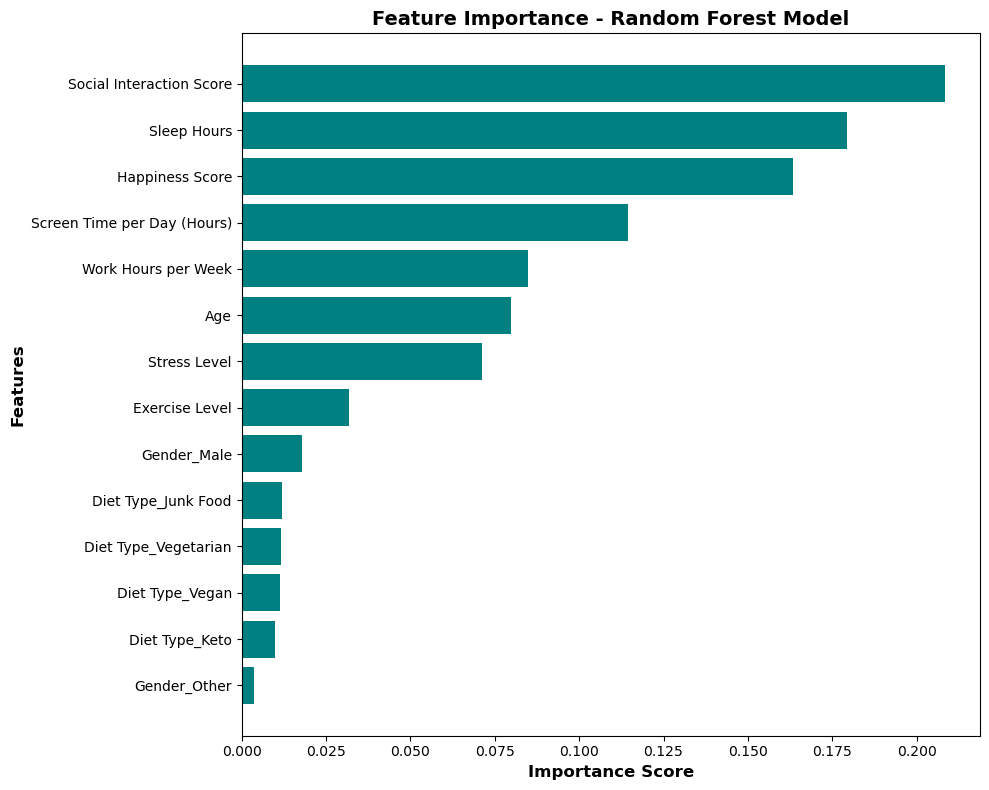

In [35]:
# Visualize feature importance
print("="*70)
print("FEATURE IMPORTANCE - BAR CHART")
print("="*70)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance - Random Forest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [36]:
# Final summary
print("="*70)
print("FINAL PROJECT SUMMARY")
print("="*70)

print("\n1. DATASET INFORMATION:")
print(f"   - Total records: {len(df)}")
print(f"   - Total features used: {X.shape[1]}")
print(f"   - Training samples: {X_train.shape[0]}")
print(f"   - Testing samples: {X_test.shape[0]}")

print("\n2. MODELS EVALUATED:")
print("   - Logistic Regression")
print("   - Decision Tree Classifier")
print("   - Random Forest Classifier")

print("\n3. MODEL PERFORMANCE:")
for idx, row in model_comparison.iterrows():
    print(f"   - {row['Model']}: {row['Accuracy (%)']:.2f}%")

print(f"\n4. BEST PERFORMING MODEL:")
print(f"   - {model_comparison.iloc[0]['Model']}")
print(f"   - Accuracy: {model_comparison.iloc[0]['Accuracy (%)']:.2f}%")

print(f"\n5. TOP 3 MOST IMPORTANT FEATURES (Random Forest):")
for idx, row in feature_importance.head(3).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")

print("\n" + "="*70)
print("PROJECT COMPLETED SUCCESSFULLY! ")
print("="*70)

FINAL PROJECT SUMMARY

1. DATASET INFORMATION:
   - Total records: 3000
   - Total features used: 14
   - Training samples: 2400
   - Testing samples: 600

2. MODELS EVALUATED:
   - Logistic Regression
   - Decision Tree Classifier
   - Random Forest Classifier

3. MODEL PERFORMANCE:
   - Random Forest: 70.50%
   - Logistic Regression: 66.83%
   - Decision Tree: 53.50%

4. BEST PERFORMING MODEL:
   - Random Forest
   - Accuracy: 70.50%

5. TOP 3 MOST IMPORTANT FEATURES (Random Forest):
   - Social Interaction Score: 0.2083
   - Sleep Hours: 0.1795
   - Happiness Score: 0.1633

PROJECT COMPLETED SUCCESSFULLY! 
